In [1]:
from deep_rl import *
import matplotlib.pyplot as plt

/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/network/home/penmetss/DeepRL/deeprl/lib

In [2]:
# DQN
def dqn_feature(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: VanillaNet(config.action_dim, FCBody(config.state_dim))
    # config.network_fn = lambda: DuelingNet(config.action_dim, FCBody(config.state_dim))
    # config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e4), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 1e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 1000
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 1e5
    config.async_actor = False
    run_steps(DQNAgent(config))

In [3]:
mkdir('log')
mkdir('tf_log')
set_one_thread()
random_seed()
select_device(-1)

In [4]:
# game = 'CartPole-v0'
game = 'FourRooms'
dqn_feature(game=game)

2020-02-28 04:38:14,732 - root - INFO: steps 0, 381300363.64 steps/s
2020-02-28 04:38:15,161 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-02-28 04:38:15,342 - root - INFO: steps 112, episodic_return_train -112
2020-02-28 04:38:15,405 - root - INFO: steps 312, episodic_return_train -200
2020-02-28 04:38:15,408 - root - INFO: steps 318, episodic_return_train -5
2020-02-28 04:38:15,426 - root - INFO: steps 373, episodic_return_train -54
2020-02-28 04:38:15,490 - root - INFO: steps 573, episodic_return_train -200
2020-02-28 04:38:15,517 - root - INFO: steps 653, episodic_return_train -79
2020-02-28 04:38:15,534 - root - INFO: steps 704, episodic_return_train -50
2020-02-28 04:38:15,575 - root - INFO: steps 835, episodic_return_train -130
2020-02-28 04:38:15,579 - root - INFO: steps 842, episodic_return_train -6
2020-02-28 04:38:15,627 - root - INFO: steps 1000, 1119.26 steps/s
2020-02-28 04:38:15,674 - root - INFO: steps 1042, episodic_return_train -200
2020-02-28 04:38:

2020-02-28 04:38:24,404 - root - INFO: steps 11595, episodic_return_train -7
2020-02-28 04:38:24,424 - root - INFO: steps 11618, episodic_return_train -22
2020-02-28 04:38:24,574 - root - INFO: steps 11818, episodic_return_train -200
2020-02-28 04:38:24,709 - root - INFO: steps 12000, 1335.84 steps/s
2020-02-28 04:38:24,723 - root - INFO: steps 12018, episodic_return_train -200
2020-02-28 04:38:24,730 - root - INFO: steps 12026, episodic_return_train -7
2020-02-28 04:38:24,755 - root - INFO: steps 12058, episodic_return_train -31
2020-02-28 04:38:24,905 - root - INFO: steps 12258, episodic_return_train -200
2020-02-28 04:38:24,913 - root - INFO: steps 12267, episodic_return_train -8
2020-02-28 04:38:24,920 - root - INFO: steps 12274, episodic_return_train -6
2020-02-28 04:38:24,960 - root - INFO: steps 12325, episodic_return_train -50
2020-02-28 04:38:25,106 - root - INFO: steps 12525, episodic_return_train -200
2020-02-28 04:38:25,122 - root - INFO: steps 12545, episodic_return_train 

2020-02-28 04:38:29,305 - root - INFO: steps 17583, episodic_return_train -29
2020-02-28 04:38:29,351 - root - INFO: steps 17640, episodic_return_train -56
2020-02-28 04:38:29,379 - root - INFO: steps 17676, episodic_return_train -35
2020-02-28 04:38:29,386 - root - INFO: steps 17684, episodic_return_train -7
2020-02-28 04:38:29,393 - root - INFO: steps 17692, episodic_return_train -7
2020-02-28 04:38:29,440 - root - INFO: steps 17752, episodic_return_train -59
2020-02-28 04:38:29,519 - root - INFO: steps 17858, episodic_return_train -105
2020-02-28 04:38:29,548 - root - INFO: steps 17893, episodic_return_train -34
2020-02-28 04:38:29,555 - root - INFO: steps 17902, episodic_return_train -8
2020-02-28 04:38:29,559 - root - INFO: steps 17905, episodic_return_train -2
2020-02-28 04:38:29,563 - root - INFO: steps 17909, episodic_return_train -3
2020-02-28 04:38:29,576 - root - INFO: steps 17927, episodic_return_train -17
2020-02-28 04:38:29,586 - root - INFO: steps 17937, episodic_return_

2020-02-28 04:38:31,477 - root - INFO: steps 20000, episodic_return_test -109.50(28.71)
2020-02-28 04:38:31,489 - root - INFO: steps 20013, episodic_return_train -13
2020-02-28 04:38:31,500 - root - INFO: steps 20026, episodic_return_train -12
2020-02-28 04:38:31,517 - root - INFO: steps 20046, episodic_return_train -19
2020-02-28 04:38:31,530 - root - INFO: steps 20063, episodic_return_train -16
2020-02-28 04:38:31,546 - root - INFO: steps 20083, episodic_return_train -19
2020-02-28 04:38:31,553 - root - INFO: steps 20088, episodic_return_train -4
2020-02-28 04:38:31,567 - root - INFO: steps 20107, episodic_return_train -18
2020-02-28 04:38:31,586 - root - INFO: steps 20131, episodic_return_train -23
2020-02-28 04:38:31,593 - root - INFO: steps 20138, episodic_return_train -6
2020-02-28 04:38:31,630 - root - INFO: steps 20186, episodic_return_train -47
2020-02-28 04:38:31,634 - root - INFO: steps 20190, episodic_return_train -3
2020-02-28 04:38:31,645 - root - INFO: steps 20202, episo

2020-02-28 04:38:33,138 - root - INFO: steps 21968, episodic_return_train -19
2020-02-28 04:38:33,145 - root - INFO: steps 21976, episodic_return_train -7
2020-02-28 04:38:33,146 - root - INFO: steps 21979, episodic_return_train -2
2020-02-28 04:38:33,156 - root - INFO: steps 21988, episodic_return_train -8
2020-02-28 04:38:33,165 - root - INFO: steps 22000, 1161.28 steps/s
2020-02-28 04:38:33,168 - root - INFO: steps 22003, episodic_return_train -14
2020-02-28 04:38:33,175 - root - INFO: steps 22009, episodic_return_train -5
2020-02-28 04:38:33,192 - root - INFO: steps 22029, episodic_return_train -19
2020-02-28 04:38:33,205 - root - INFO: steps 22045, episodic_return_train -15
2020-02-28 04:38:33,234 - root - INFO: steps 22080, episodic_return_train -34
2020-02-28 04:38:33,244 - root - INFO: steps 22095, episodic_return_train -14
2020-02-28 04:38:33,260 - root - INFO: steps 22113, episodic_return_train -17
2020-02-28 04:38:33,267 - root - INFO: steps 22120, episodic_return_train -6
2

2020-02-28 04:38:34,543 - root - INFO: steps 23639, episodic_return_train -24
2020-02-28 04:38:34,554 - root - INFO: steps 23649, episodic_return_train -9
2020-02-28 04:38:34,570 - root - INFO: steps 23669, episodic_return_train -19
2020-02-28 04:38:34,583 - root - INFO: steps 23684, episodic_return_train -14
2020-02-28 04:38:34,599 - root - INFO: steps 23705, episodic_return_train -20
2020-02-28 04:38:34,603 - root - INFO: steps 23711, episodic_return_train -5
2020-02-28 04:38:34,623 - root - INFO: steps 23735, episodic_return_train -23
2020-02-28 04:38:34,646 - root - INFO: steps 23761, episodic_return_train -25
2020-02-28 04:38:34,653 - root - INFO: steps 23770, episodic_return_train -8
2020-02-28 04:38:34,660 - root - INFO: steps 23778, episodic_return_train -7
2020-02-28 04:38:34,667 - root - INFO: steps 23784, episodic_return_train -5
2020-02-28 04:38:34,674 - root - INFO: steps 23793, episodic_return_train -8
2020-02-28 04:38:34,685 - root - INFO: steps 23807, episodic_return_tr

2020-02-28 04:38:35,881 - root - INFO: steps 25087, episodic_return_train -10
2020-02-28 04:38:35,903 - root - INFO: steps 25115, episodic_return_train -27
2020-02-28 04:38:35,916 - root - INFO: steps 25129, episodic_return_train -13
2020-02-28 04:38:35,930 - root - INFO: steps 25147, episodic_return_train -17
2020-02-28 04:38:35,937 - root - INFO: steps 25154, episodic_return_train -6
2020-02-28 04:38:35,956 - root - INFO: steps 25179, episodic_return_train -24
2020-02-28 04:38:35,964 - root - INFO: steps 25187, episodic_return_train -7
2020-02-28 04:38:35,980 - root - INFO: steps 25206, episodic_return_train -18
2020-02-28 04:38:35,990 - root - INFO: steps 25216, episodic_return_train -9
2020-02-28 04:38:35,994 - root - INFO: steps 25220, episodic_return_train -3
2020-02-28 04:38:35,995 - root - INFO: steps 25223, episodic_return_train -2
2020-02-28 04:38:36,012 - root - INFO: steps 25242, episodic_return_train -18
2020-02-28 04:38:36,025 - root - INFO: steps 25257, episodic_return_t

2020-02-28 04:38:37,106 - root - INFO: steps 26555, episodic_return_train -6
2020-02-28 04:38:37,119 - root - INFO: steps 26571, episodic_return_train -15
2020-02-28 04:38:37,129 - root - INFO: steps 26581, episodic_return_train -9
2020-02-28 04:38:37,139 - root - INFO: steps 26592, episodic_return_train -10
2020-02-28 04:38:37,158 - root - INFO: steps 26617, episodic_return_train -24
2020-02-28 04:38:37,177 - root - INFO: steps 26641, episodic_return_train -23
2020-02-28 04:38:37,190 - root - INFO: steps 26658, episodic_return_train -16
2020-02-28 04:38:37,201 - root - INFO: steps 26671, episodic_return_train -12
2020-02-28 04:38:37,208 - root - INFO: steps 26677, episodic_return_train -5
2020-02-28 04:38:37,224 - root - INFO: steps 26696, episodic_return_train -18
2020-02-28 04:38:37,284 - root - INFO: steps 26778, episodic_return_train -81
2020-02-28 04:38:37,314 - root - INFO: steps 26816, episodic_return_train -37
2020-02-28 04:38:37,327 - root - INFO: steps 26834, episodic_return

2020-02-28 04:38:38,325 - root - INFO: steps 28018, episodic_return_train -6
2020-02-28 04:38:38,335 - root - INFO: steps 28028, episodic_return_train -9
2020-02-28 04:38:38,348 - root - INFO: steps 28045, episodic_return_train -16
2020-02-28 04:38:38,359 - root - INFO: steps 28058, episodic_return_train -12
2020-02-28 04:38:38,372 - root - INFO: steps 28075, episodic_return_train -16
2020-02-28 04:38:38,385 - root - INFO: steps 28091, episodic_return_train -15
2020-02-28 04:38:38,414 - root - INFO: steps 28126, episodic_return_train -34
2020-02-28 04:38:38,437 - root - INFO: steps 28154, episodic_return_train -27
2020-02-28 04:38:38,460 - root - INFO: steps 28180, episodic_return_train -25
2020-02-28 04:38:38,470 - root - INFO: steps 28193, episodic_return_train -12
2020-02-28 04:38:38,471 - root - INFO: steps 28194, episodic_return_train 0
2020-02-28 04:38:38,494 - root - INFO: steps 28221, episodic_return_train -26
2020-02-28 04:38:38,511 - root - INFO: steps 28240, episodic_return_

2020-02-28 04:38:39,802 - root - INFO: steps 29761, episodic_return_train -14
2020-02-28 04:38:39,809 - root - INFO: steps 29769, episodic_return_train -7
2020-02-28 04:38:39,829 - root - INFO: steps 29795, episodic_return_train -25
2020-02-28 04:38:39,852 - root - INFO: steps 29820, episodic_return_train -24
2020-02-28 04:38:39,860 - root - INFO: steps 29829, episodic_return_train -8
2020-02-28 04:38:39,870 - root - INFO: steps 29842, episodic_return_train -12
2020-02-28 04:38:39,881 - root - INFO: steps 29855, episodic_return_train -12
2020-02-28 04:38:39,898 - root - INFO: steps 29873, episodic_return_train -17
2020-02-28 04:38:39,905 - root - INFO: steps 29882, episodic_return_train -8
2020-02-28 04:38:39,914 - root - INFO: steps 29890, episodic_return_train -7
2020-02-28 04:38:39,931 - root - INFO: steps 29910, episodic_return_train -19
2020-02-28 04:38:39,945 - root - INFO: steps 29926, episodic_return_train -15
2020-02-28 04:38:39,950 - root - INFO: steps 29930, episodic_return_

2020-02-28 04:38:41,142 - root - INFO: steps 31251, episodic_return_train -9
2020-02-28 04:38:41,149 - root - INFO: steps 31257, episodic_return_train -5
2020-02-28 04:38:41,163 - root - INFO: steps 31272, episodic_return_train -14
2020-02-28 04:38:41,173 - root - INFO: steps 31287, episodic_return_train -14
2020-02-28 04:38:41,190 - root - INFO: steps 31305, episodic_return_train -17
2020-02-28 04:38:41,204 - root - INFO: steps 31320, episodic_return_train -14
2020-02-28 04:38:41,218 - root - INFO: steps 31337, episodic_return_train -16
2020-02-28 04:38:41,229 - root - INFO: steps 31350, episodic_return_train -12
2020-02-28 04:38:41,263 - root - INFO: steps 31389, episodic_return_train -38
2020-02-28 04:38:41,271 - root - INFO: steps 31396, episodic_return_train -6
2020-02-28 04:38:41,281 - root - INFO: steps 31408, episodic_return_train -11
2020-02-28 04:38:41,286 - root - INFO: steps 31414, episodic_return_train -5
2020-02-28 04:38:41,296 - root - INFO: steps 31424, episodic_return_

2020-02-28 04:38:42,514 - root - INFO: steps 32847, episodic_return_train -26
2020-02-28 04:38:42,538 - root - INFO: steps 32875, episodic_return_train -27
2020-02-28 04:38:42,564 - root - INFO: steps 32906, episodic_return_train -30
2020-02-28 04:38:42,591 - root - INFO: steps 32936, episodic_return_train -29
2020-02-28 04:38:42,595 - root - INFO: steps 32941, episodic_return_train -4
2020-02-28 04:38:42,600 - root - INFO: steps 32947, episodic_return_train -5
2020-02-28 04:38:42,616 - root - INFO: steps 32964, episodic_return_train -16
2020-02-28 04:38:42,621 - root - INFO: steps 32968, episodic_return_train -3
2020-02-28 04:38:42,634 - root - INFO: steps 32987, episodic_return_train -18
2020-02-28 04:38:42,642 - root - INFO: steps 32995, episodic_return_train -7
2020-02-28 04:38:42,648 - root - INFO: steps 33000, 1155.79 steps/s
2020-02-28 04:38:42,669 - root - INFO: steps 33027, episodic_return_train -31
2020-02-28 04:38:42,683 - root - INFO: steps 33041, episodic_return_train -13


2020-02-28 04:38:43,961 - root - INFO: steps 34496, episodic_return_train -15
2020-02-28 04:38:43,983 - root - INFO: steps 34526, episodic_return_train -29
2020-02-28 04:38:43,991 - root - INFO: steps 34534, episodic_return_train -7
2020-02-28 04:38:44,014 - root - INFO: steps 34561, episodic_return_train -26
2020-02-28 04:38:44,025 - root - INFO: steps 34574, episodic_return_train -12
2020-02-28 04:38:44,048 - root - INFO: steps 34601, episodic_return_train -26
2020-02-28 04:38:44,058 - root - INFO: steps 34615, episodic_return_train -13
2020-02-28 04:38:44,084 - root - INFO: steps 34646, episodic_return_train -30
2020-02-28 04:38:44,104 - root - INFO: steps 34668, episodic_return_train -21
2020-02-28 04:38:44,118 - root - INFO: steps 34684, episodic_return_train -15
2020-02-28 04:38:44,134 - root - INFO: steps 34707, episodic_return_train -22
2020-02-28 04:38:44,154 - root - INFO: steps 34730, episodic_return_train -22
2020-02-28 04:38:44,170 - root - INFO: steps 34750, episodic_retu

2020-02-28 04:38:45,574 - root - INFO: steps 36180, episodic_return_train -26
2020-02-28 04:38:45,575 - root - INFO: steps 36182, episodic_return_train -1
2020-02-28 04:38:45,589 - root - INFO: steps 36196, episodic_return_train -13
2020-02-28 04:38:45,593 - root - INFO: steps 36200, episodic_return_train -3
2020-02-28 04:38:45,607 - root - INFO: steps 36219, episodic_return_train -18
2020-02-28 04:38:45,617 - root - INFO: steps 36231, episodic_return_train -11
2020-02-28 04:38:45,628 - root - INFO: steps 36241, episodic_return_train -9
2020-02-28 04:38:45,644 - root - INFO: steps 36263, episodic_return_train -21
2020-02-28 04:38:45,671 - root - INFO: steps 36292, episodic_return_train -28
2020-02-28 04:38:45,690 - root - INFO: steps 36318, episodic_return_train -25
2020-02-28 04:38:45,701 - root - INFO: steps 36330, episodic_return_train -11
2020-02-28 04:38:45,714 - root - INFO: steps 36346, episodic_return_train -15
2020-02-28 04:38:45,734 - root - INFO: steps 36370, episodic_return

2020-02-28 04:38:46,985 - root - INFO: steps 37832, episodic_return_train -26
2020-02-28 04:38:46,993 - root - INFO: steps 37843, episodic_return_train -10
2020-02-28 04:38:47,003 - root - INFO: steps 37852, episodic_return_train -8
2020-02-28 04:38:47,021 - root - INFO: steps 37873, episodic_return_train -20
2020-02-28 04:38:47,028 - root - INFO: steps 37882, episodic_return_train -8
2020-02-28 04:38:47,046 - root - INFO: steps 37900, episodic_return_train -17
2020-02-28 04:38:47,056 - root - INFO: steps 37914, episodic_return_train -13
2020-02-28 04:38:47,064 - root - INFO: steps 37923, episodic_return_train -8
2020-02-28 04:38:47,068 - root - INFO: steps 37926, episodic_return_train -2
2020-02-28 04:38:47,079 - root - INFO: steps 37938, episodic_return_train -11
2020-02-28 04:38:47,102 - root - INFO: steps 37967, episodic_return_train -28
2020-02-28 04:38:47,116 - root - INFO: steps 37982, episodic_return_train -14
2020-02-28 04:38:47,131 - root - INFO: steps 38000, 1163.03 steps/s


2020-02-28 04:38:48,328 - root - INFO: steps 39428, episodic_return_train -26
2020-02-28 04:38:48,338 - root - INFO: steps 39442, episodic_return_train -13
2020-02-28 04:38:48,342 - root - INFO: steps 39446, episodic_return_train -3
2020-02-28 04:38:48,351 - root - INFO: steps 39458, episodic_return_train -11
2020-02-28 04:38:48,370 - root - INFO: steps 39481, episodic_return_train -22
2020-02-28 04:38:48,385 - root - INFO: steps 39500, episodic_return_train -18
2020-02-28 04:38:48,407 - root - INFO: steps 39531, episodic_return_train -30
2020-02-28 04:38:48,413 - root - INFO: steps 39536, episodic_return_train -4
2020-02-28 04:38:48,426 - root - INFO: steps 39552, episodic_return_train -15
2020-02-28 04:38:48,442 - root - INFO: steps 39572, episodic_return_train -19
2020-02-28 04:38:48,449 - root - INFO: steps 39582, episodic_return_train -9
2020-02-28 04:38:48,483 - root - INFO: steps 39624, episodic_return_train -41
2020-02-28 04:38:48,493 - root - INFO: steps 39639, episodic_return

2020-02-28 04:38:49,591 - root - INFO: steps 40920, episodic_return_train -5
2020-02-28 04:38:49,598 - root - INFO: steps 40928, episodic_return_train -7
2020-02-28 04:38:49,611 - root - INFO: steps 40945, episodic_return_train -16
2020-02-28 04:38:49,612 - root - INFO: steps 40947, episodic_return_train -1
2020-02-28 04:38:49,620 - root - INFO: steps 40953, episodic_return_train -5
2020-02-28 04:38:49,636 - root - INFO: steps 40975, episodic_return_train -21
2020-02-28 04:38:49,653 - root - INFO: steps 40993, episodic_return_train -17
2020-02-28 04:38:49,659 - root - INFO: steps 41000, 1145.55 steps/s
2020-02-28 04:38:49,661 - root - INFO: steps 41000, episodic_return_train -6
2020-02-28 04:38:49,671 - root - INFO: steps 41014, episodic_return_train -13
2020-02-28 04:38:49,685 - root - INFO: steps 41030, episodic_return_train -15
2020-02-28 04:38:49,695 - root - INFO: steps 41040, episodic_return_train -9
2020-02-28 04:38:49,711 - root - INFO: steps 41061, episodic_return_train -20
20

2020-02-28 04:38:50,858 - root - INFO: steps 42418, episodic_return_train -17
2020-02-28 04:38:50,875 - root - INFO: steps 42436, episodic_return_train -17
2020-02-28 04:38:50,880 - root - INFO: steps 42443, episodic_return_train -6
2020-02-28 04:38:50,884 - root - INFO: steps 42446, episodic_return_train -2
2020-02-28 04:38:50,892 - root - INFO: steps 42455, episodic_return_train -8
2020-02-28 04:38:50,914 - root - INFO: steps 42480, episodic_return_train -24
2020-02-28 04:38:50,929 - root - INFO: steps 42499, episodic_return_train -18
2020-02-28 04:38:50,933 - root - INFO: steps 42502, episodic_return_train -2
2020-02-28 04:38:50,949 - root - INFO: steps 42522, episodic_return_train -19
2020-02-28 04:38:50,969 - root - INFO: steps 42545, episodic_return_train -22
2020-02-28 04:38:50,979 - root - INFO: steps 42556, episodic_return_train -10
2020-02-28 04:38:50,996 - root - INFO: steps 42579, episodic_return_train -22
2020-02-28 04:38:51,006 - root - INFO: steps 42589, episodic_return_

2020-02-28 04:38:52,152 - root - INFO: steps 43940, episodic_return_train -10
2020-02-28 04:38:52,156 - root - INFO: steps 43944, episodic_return_train -3
2020-02-28 04:38:52,164 - root - INFO: steps 43955, episodic_return_train -10
2020-02-28 04:38:52,177 - root - INFO: steps 43968, episodic_return_train -12
2020-02-28 04:38:52,184 - root - INFO: steps 43979, episodic_return_train -10
2020-02-28 04:38:52,203 - root - INFO: steps 44000, 1178.32 steps/s
2020-02-28 04:38:52,211 - root - INFO: steps 44008, episodic_return_train -28
2020-02-28 04:38:52,231 - root - INFO: steps 44035, episodic_return_train -26
2020-02-28 04:38:52,244 - root - INFO: steps 44051, episodic_return_train -15
2020-02-28 04:38:52,254 - root - INFO: steps 44060, episodic_return_train -8
2020-02-28 04:38:52,270 - root - INFO: steps 44082, episodic_return_train -21
2020-02-28 04:38:52,274 - root - INFO: steps 44085, episodic_return_train -2
2020-02-28 04:38:52,285 - root - INFO: steps 44097, episodic_return_train -11

2020-02-28 04:38:53,560 - root - INFO: steps 45376, episodic_return_train -2
2020-02-28 04:38:53,561 - root - INFO: steps 45379, episodic_return_train -2
2020-02-28 04:38:53,581 - root - INFO: steps 45401, episodic_return_train -21
2020-02-28 04:38:53,613 - root - INFO: steps 45443, episodic_return_train -41
2020-02-28 04:38:53,620 - root - INFO: steps 45448, episodic_return_train -4
2020-02-28 04:38:53,625 - root - INFO: steps 45455, episodic_return_train -6
2020-02-28 04:38:53,629 - root - INFO: steps 45458, episodic_return_train -2
2020-02-28 04:38:53,633 - root - INFO: steps 45461, episodic_return_train -2
2020-02-28 04:38:53,643 - root - INFO: steps 45473, episodic_return_train -11
2020-02-28 04:38:53,650 - root - INFO: steps 45482, episodic_return_train -8
2020-02-28 04:38:53,657 - root - INFO: steps 45491, episodic_return_train -8
2020-02-28 04:38:53,667 - root - INFO: steps 45502, episodic_return_train -10
2020-02-28 04:38:53,684 - root - INFO: steps 45520, episodic_return_trai

2020-02-28 04:38:54,802 - root - INFO: steps 46822, episodic_return_train -22
2020-02-28 04:38:54,809 - root - INFO: steps 46831, episodic_return_train -8
2020-02-28 04:38:54,814 - root - INFO: steps 46833, episodic_return_train -1
2020-02-28 04:38:54,818 - root - INFO: steps 46839, episodic_return_train -5
2020-02-28 04:38:54,829 - root - INFO: steps 46851, episodic_return_train -11
2020-02-28 04:38:54,836 - root - INFO: steps 46858, episodic_return_train -6
2020-02-28 04:38:54,846 - root - INFO: steps 46869, episodic_return_train -10
2020-02-28 04:38:54,854 - root - INFO: steps 46879, episodic_return_train -9
2020-02-28 04:38:54,874 - root - INFO: steps 46900, episodic_return_train -20
2020-02-28 04:38:54,890 - root - INFO: steps 46922, episodic_return_train -21
2020-02-28 04:38:54,914 - root - INFO: steps 46948, episodic_return_train -25
2020-02-28 04:38:54,924 - root - INFO: steps 46962, episodic_return_train -13
2020-02-28 04:38:54,929 - root - INFO: steps 46966, episodic_return_t

2020-02-28 04:38:56,069 - root - INFO: steps 48290, episodic_return_train -18
2020-02-28 04:38:56,073 - root - INFO: steps 48293, episodic_return_train -2
2020-02-28 04:38:56,084 - root - INFO: steps 48305, episodic_return_train -11
2020-02-28 04:38:56,088 - root - INFO: steps 48310, episodic_return_train -4
2020-02-28 04:38:56,105 - root - INFO: steps 48331, episodic_return_train -20
2020-02-28 04:38:56,110 - root - INFO: steps 48334, episodic_return_train -2
2020-02-28 04:38:56,110 - root - INFO: steps 48335, episodic_return_train 0
2020-02-28 04:38:56,128 - root - INFO: steps 48354, episodic_return_train -18
2020-02-28 04:38:56,129 - root - INFO: steps 48355, episodic_return_train 0
2020-02-28 04:38:56,147 - root - INFO: steps 48372, episodic_return_train -16
2020-02-28 04:38:56,151 - root - INFO: steps 48377, episodic_return_train -4
2020-02-28 04:38:56,158 - root - INFO: steps 48385, episodic_return_train -7
2020-02-28 04:38:56,169 - root - INFO: steps 48397, episodic_return_train

2020-02-28 04:38:57,317 - root - INFO: steps 49723, episodic_return_train -13
2020-02-28 04:38:57,328 - root - INFO: steps 49732, episodic_return_train -8
2020-02-28 04:38:57,354 - root - INFO: steps 49765, episodic_return_train -32
2020-02-28 04:38:57,365 - root - INFO: steps 49779, episodic_return_train -13
2020-02-28 04:38:57,376 - root - INFO: steps 49791, episodic_return_train -11
2020-02-28 04:38:57,390 - root - INFO: steps 49805, episodic_return_train -13
2020-02-28 04:38:57,390 - root - INFO: steps 49807, episodic_return_train -1
2020-02-28 04:38:57,436 - root - INFO: steps 49861, episodic_return_train -53
2020-02-28 04:38:57,440 - root - INFO: steps 49866, episodic_return_train -4
2020-02-28 04:38:57,476 - root - INFO: steps 49911, episodic_return_train -44
2020-02-28 04:38:57,483 - root - INFO: steps 49916, episodic_return_train -4
2020-02-28 04:38:57,484 - root - INFO: steps 49917, episodic_return_train 0
2020-02-28 04:38:57,504 - root - INFO: steps 49943, episodic_return_tr

2020-02-28 04:38:58,703 - root - INFO: steps 51258, episodic_return_train -21
2020-02-28 04:38:58,711 - root - INFO: steps 51265, episodic_return_train -6
2020-02-28 04:38:58,721 - root - INFO: steps 51276, episodic_return_train -10
2020-02-28 04:38:58,735 - root - INFO: steps 51294, episodic_return_train -17
2020-02-28 04:38:58,745 - root - INFO: steps 51305, episodic_return_train -10
2020-02-28 04:38:58,759 - root - INFO: steps 51321, episodic_return_train -15
2020-02-28 04:38:58,770 - root - INFO: steps 51335, episodic_return_train -13
2020-02-28 04:38:58,794 - root - INFO: steps 51363, episodic_return_train -27
2020-02-28 04:38:58,804 - root - INFO: steps 51374, episodic_return_train -10
2020-02-28 04:38:58,837 - root - INFO: steps 51415, episodic_return_train -40
2020-02-28 04:38:58,842 - root - INFO: steps 51417, episodic_return_train -1
2020-02-28 04:38:58,852 - root - INFO: steps 51429, episodic_return_train -11
2020-02-28 04:38:58,857 - root - INFO: steps 51434, episodic_retur

2020-02-28 04:39:00,056 - root - INFO: steps 52804, episodic_return_train -4
2020-02-28 04:39:00,063 - root - INFO: steps 52815, episodic_return_train -10
2020-02-28 04:39:00,070 - root - INFO: steps 52821, episodic_return_train -5
2020-02-28 04:39:00,074 - root - INFO: steps 52825, episodic_return_train -3
2020-02-28 04:39:00,079 - root - INFO: steps 52830, episodic_return_train -4
2020-02-28 04:39:00,095 - root - INFO: steps 52851, episodic_return_train -20
2020-02-28 04:39:00,106 - root - INFO: steps 52861, episodic_return_train -9
2020-02-28 04:39:00,113 - root - INFO: steps 52870, episodic_return_train -8
2020-02-28 04:39:00,133 - root - INFO: steps 52895, episodic_return_train -24
2020-02-28 04:39:00,140 - root - INFO: steps 52902, episodic_return_train -6
2020-02-28 04:39:00,150 - root - INFO: steps 52915, episodic_return_train -12
2020-02-28 04:39:00,164 - root - INFO: steps 52929, episodic_return_train -13
2020-02-28 04:39:00,181 - root - INFO: steps 52950, episodic_return_tra

2020-02-28 04:39:01,326 - root - INFO: steps 54266, episodic_return_train -6
2020-02-28 04:39:01,334 - root - INFO: steps 54273, episodic_return_train -6
2020-02-28 04:39:01,354 - root - INFO: steps 54299, episodic_return_train -25
2020-02-28 04:39:01,378 - root - INFO: steps 54324, episodic_return_train -24
2020-02-28 04:39:01,394 - root - INFO: steps 54346, episodic_return_train -21
2020-02-28 04:39:01,421 - root - INFO: steps 54376, episodic_return_train -29
2020-02-28 04:39:01,434 - root - INFO: steps 54394, episodic_return_train -17
2020-02-28 04:39:01,442 - root - INFO: steps 54401, episodic_return_train -6
2020-02-28 04:39:01,465 - root - INFO: steps 54429, episodic_return_train -27
2020-02-28 04:39:01,479 - root - INFO: steps 54445, episodic_return_train -15
2020-02-28 04:39:01,487 - root - INFO: steps 54453, episodic_return_train -7
2020-02-28 04:39:01,508 - root - INFO: steps 54479, episodic_return_train -25
2020-02-28 04:39:01,515 - root - INFO: steps 54486, episodic_return_

2020-02-28 04:39:02,646 - root - INFO: steps 55750, episodic_return_train -21
2020-02-28 04:39:02,654 - root - INFO: steps 55758, episodic_return_train -7
2020-02-28 04:39:02,658 - root - INFO: steps 55760, episodic_return_train -1
2020-02-28 04:39:02,665 - root - INFO: steps 55771, episodic_return_train -10
2020-02-28 04:39:02,676 - root - INFO: steps 55780, episodic_return_train -8
2020-02-28 04:39:02,683 - root - INFO: steps 55788, episodic_return_train -7
2020-02-28 04:39:02,691 - root - INFO: steps 55796, episodic_return_train -7
2020-02-28 04:39:02,691 - root - INFO: steps 55799, episodic_return_train -2
2020-02-28 04:39:02,712 - root - INFO: steps 55821, episodic_return_train -21
2020-02-28 04:39:02,730 - root - INFO: steps 55843, episodic_return_train -21
2020-02-28 04:39:02,734 - root - INFO: steps 55847, episodic_return_train -3
2020-02-28 04:39:02,748 - root - INFO: steps 55861, episodic_return_train -13
2020-02-28 04:39:02,762 - root - INFO: steps 55877, episodic_return_tra

2020-02-28 04:39:03,875 - root - INFO: steps 57102, episodic_return_train -8
2020-02-28 04:39:03,879 - root - INFO: steps 57107, episodic_return_train -4
2020-02-28 04:39:03,896 - root - INFO: steps 57126, episodic_return_train -18
2020-02-28 04:39:03,903 - root - INFO: steps 57134, episodic_return_train -7
2020-02-28 04:39:03,913 - root - INFO: steps 57144, episodic_return_train -9
2020-02-28 04:39:03,927 - root - INFO: steps 57160, episodic_return_train -15
2020-02-28 04:39:03,935 - root - INFO: steps 57169, episodic_return_train -8
2020-02-28 04:39:03,948 - root - INFO: steps 57184, episodic_return_train -14
2020-02-28 04:39:03,969 - root - INFO: steps 57210, episodic_return_train -25
2020-02-28 04:39:03,976 - root - INFO: steps 57216, episodic_return_train -5
2020-02-28 04:39:03,993 - root - INFO: steps 57236, episodic_return_train -19
2020-02-28 04:39:03,997 - root - INFO: steps 57243, episodic_return_train -6
2020-02-28 04:39:04,014 - root - INFO: steps 57261, episodic_return_tra

2020-02-28 04:39:05,103 - root - INFO: steps 58508, episodic_return_train -8
2020-02-28 04:39:05,107 - root - INFO: steps 58514, episodic_return_train -5
2020-02-28 04:39:05,114 - root - INFO: steps 58523, episodic_return_train -8
2020-02-28 04:39:05,122 - root - INFO: steps 58528, episodic_return_train -4
2020-02-28 04:39:05,129 - root - INFO: steps 58539, episodic_return_train -10
2020-02-28 04:39:05,153 - root - INFO: steps 58564, episodic_return_train -24
2020-02-28 04:39:05,166 - root - INFO: steps 58580, episodic_return_train -15
2020-02-28 04:39:05,174 - root - INFO: steps 58591, episodic_return_train -10
2020-02-28 04:39:05,184 - root - INFO: steps 58602, episodic_return_train -10
2020-02-28 04:39:05,204 - root - INFO: steps 58624, episodic_return_train -21
2020-02-28 04:39:05,221 - root - INFO: steps 58644, episodic_return_train -19
2020-02-28 04:39:05,232 - root - INFO: steps 58656, episodic_return_train -11
2020-02-28 04:39:05,239 - root - INFO: steps 58664, episodic_return_

2020-02-28 04:39:06,387 - root - INFO: steps 59979, episodic_return_train -10
2020-02-28 04:39:06,392 - root - INFO: steps 59982, episodic_return_train -2
2020-02-28 04:39:06,408 - root - INFO: steps 60000, 1138.08 steps/s
2020-02-28 04:39:06,440 - root - INFO: steps 60000, episodic_return_test -11.10(2.24)
2020-02-28 04:39:06,446 - root - INFO: steps 60006, episodic_return_train -23
2020-02-28 04:39:06,470 - root - INFO: steps 60035, episodic_return_train -28
2020-02-28 04:39:06,484 - root - INFO: steps 60051, episodic_return_train -15
2020-02-28 04:39:06,491 - root - INFO: steps 60058, episodic_return_train -6
2020-02-28 04:39:06,502 - root - INFO: steps 60071, episodic_return_train -12
2020-02-28 04:39:06,526 - root - INFO: steps 60096, episodic_return_train -24
2020-02-28 04:39:06,556 - root - INFO: steps 60133, episodic_return_train -36
2020-02-28 04:39:06,560 - root - INFO: steps 60137, episodic_return_train -3
2020-02-28 04:39:06,561 - root - INFO: steps 60139, episodic_return_t

2020-02-28 04:39:07,773 - root - INFO: steps 61493, episodic_return_train -25
2020-02-28 04:39:07,784 - root - INFO: steps 61504, episodic_return_train -10
2020-02-28 04:39:07,785 - root - INFO: steps 61506, episodic_return_train -1
2020-02-28 04:39:07,790 - root - INFO: steps 61508, episodic_return_train -1
2020-02-28 04:39:07,795 - root - INFO: steps 61513, episodic_return_train -4
2020-02-28 04:39:07,806 - root - INFO: steps 61525, episodic_return_train -11
2020-02-28 04:39:07,810 - root - INFO: steps 61529, episodic_return_train -3
2020-02-28 04:39:07,815 - root - INFO: steps 61533, episodic_return_train -3
2020-02-28 04:39:07,829 - root - INFO: steps 61549, episodic_return_train -15
2020-02-28 04:39:07,840 - root - INFO: steps 61561, episodic_return_train -11
2020-02-28 04:39:07,841 - root - INFO: steps 61563, episodic_return_train -1
2020-02-28 04:39:07,850 - root - INFO: steps 61569, episodic_return_train -5
2020-02-28 04:39:07,864 - root - INFO: steps 61587, episodic_return_tra

2020-02-28 04:39:09,015 - root - INFO: steps 62867, episodic_return_train -26
2020-02-28 04:39:09,029 - root - INFO: steps 62880, episodic_return_train -12
2020-02-28 04:39:09,037 - root - INFO: steps 62888, episodic_return_train -7
2020-02-28 04:39:09,045 - root - INFO: steps 62897, episodic_return_train -8
2020-02-28 04:39:09,053 - root - INFO: steps 62907, episodic_return_train -9
2020-02-28 04:39:09,063 - root - INFO: steps 62919, episodic_return_train -11
2020-02-28 04:39:09,071 - root - INFO: steps 62927, episodic_return_train -7
2020-02-28 04:39:09,082 - root - INFO: steps 62936, episodic_return_train -8
2020-02-28 04:39:09,087 - root - INFO: steps 62940, episodic_return_train -3
2020-02-28 04:39:09,120 - root - INFO: steps 62980, episodic_return_train -39
2020-02-28 04:39:09,128 - root - INFO: steps 62989, episodic_return_train -8
2020-02-28 04:39:09,132 - root - INFO: steps 62994, episodic_return_train -4
2020-02-28 04:39:09,139 - root - INFO: steps 63000, 1120.65 steps/s
2020

2020-02-28 04:39:10,305 - root - INFO: steps 64315, episodic_return_train -32
2020-02-28 04:39:10,315 - root - INFO: steps 64325, episodic_return_train -9
2020-02-28 04:39:10,319 - root - INFO: steps 64330, episodic_return_train -4
2020-02-28 04:39:10,349 - root - INFO: steps 64365, episodic_return_train -34
2020-02-28 04:39:10,357 - root - INFO: steps 64373, episodic_return_train -7
2020-02-28 04:39:10,374 - root - INFO: steps 64393, episodic_return_train -19
2020-02-28 04:39:10,378 - root - INFO: steps 64396, episodic_return_train -2
2020-02-28 04:39:10,395 - root - INFO: steps 64416, episodic_return_train -19
2020-02-28 04:39:10,409 - root - INFO: steps 64433, episodic_return_train -16
2020-02-28 04:39:10,423 - root - INFO: steps 64448, episodic_return_train -14
2020-02-28 04:39:10,436 - root - INFO: steps 64467, episodic_return_train -18
2020-02-28 04:39:10,444 - root - INFO: steps 64473, episodic_return_train -5
2020-02-28 04:39:10,454 - root - INFO: steps 64486, episodic_return_t

2020-02-28 04:39:11,739 - root - INFO: steps 65916, episodic_return_train -29
2020-02-28 04:39:11,743 - root - INFO: steps 65923, episodic_return_train -6
2020-02-28 04:39:11,757 - root - INFO: steps 65937, episodic_return_train -13
2020-02-28 04:39:11,767 - root - INFO: steps 65950, episodic_return_train -12
2020-02-28 04:39:11,781 - root - INFO: steps 65964, episodic_return_train -13
2020-02-28 04:39:11,789 - root - INFO: steps 65972, episodic_return_train -7
2020-02-28 04:39:11,796 - root - INFO: steps 65983, episodic_return_train -10
2020-02-28 04:39:11,812 - root - INFO: steps 66000, 1107.83 steps/s
2020-02-28 04:39:11,817 - root - INFO: steps 66007, episodic_return_train -23
2020-02-28 04:39:11,837 - root - INFO: steps 66031, episodic_return_train -23
2020-02-28 04:39:11,857 - root - INFO: steps 66052, episodic_return_train -20
2020-02-28 04:39:11,868 - root - INFO: steps 66067, episodic_return_train -14
2020-02-28 04:39:11,875 - root - INFO: steps 66075, episodic_return_train -7

2020-02-28 04:39:12,956 - root - INFO: steps 67295, episodic_return_train -2
2020-02-28 04:39:12,981 - root - INFO: steps 67322, episodic_return_train -26
2020-02-28 04:39:12,998 - root - INFO: steps 67343, episodic_return_train -20
2020-02-28 04:39:13,003 - root - INFO: steps 67345, episodic_return_train -1
2020-02-28 04:39:13,014 - root - INFO: steps 67356, episodic_return_train -10
2020-02-28 04:39:13,015 - root - INFO: steps 67357, episodic_return_train 0
2020-02-28 04:39:13,019 - root - INFO: steps 67362, episodic_return_train -4
2020-02-28 04:39:13,027 - root - INFO: steps 67370, episodic_return_train -7
2020-02-28 04:39:13,045 - root - INFO: steps 67389, episodic_return_train -18
2020-02-28 04:39:13,049 - root - INFO: steps 67392, episodic_return_train -2
2020-02-28 04:39:13,050 - root - INFO: steps 67393, episodic_return_train 0
2020-02-28 04:39:13,051 - root - INFO: steps 67395, episodic_return_train -1
2020-02-28 04:39:13,062 - root - INFO: steps 67406, episodic_return_train 

2020-02-28 04:39:14,208 - root - INFO: steps 68676, episodic_return_train -16
2020-02-28 04:39:14,218 - root - INFO: steps 68691, episodic_return_train -14
2020-02-28 04:39:14,232 - root - INFO: steps 68707, episodic_return_train -15
2020-02-28 04:39:14,245 - root - INFO: steps 68720, episodic_return_train -12
2020-02-28 04:39:14,274 - root - INFO: steps 68757, episodic_return_train -36
2020-02-28 04:39:14,275 - root - INFO: steps 68759, episodic_return_train -1
2020-02-28 04:39:14,299 - root - INFO: steps 68785, episodic_return_train -25
2020-02-28 04:39:14,316 - root - INFO: steps 68806, episodic_return_train -20
2020-02-28 04:39:14,342 - root - INFO: steps 68837, episodic_return_train -30
2020-02-28 04:39:14,356 - root - INFO: steps 68854, episodic_return_train -16
2020-02-28 04:39:14,366 - root - INFO: steps 68864, episodic_return_train -9
2020-02-28 04:39:14,383 - root - INFO: steps 68886, episodic_return_train -21
2020-02-28 04:39:14,397 - root - INFO: steps 68902, episodic_retur

2020-02-28 04:39:15,480 - root - INFO: steps 70113, episodic_return_train -10
2020-02-28 04:39:15,495 - root - INFO: steps 70129, episodic_return_train -15
2020-02-28 04:39:15,505 - root - INFO: steps 70142, episodic_return_train -12
2020-02-28 04:39:15,522 - root - INFO: steps 70162, episodic_return_train -19
2020-02-28 04:39:15,527 - root - INFO: steps 70165, episodic_return_train -2
2020-02-28 04:39:15,538 - root - INFO: steps 70176, episodic_return_train -10
2020-02-28 04:39:15,555 - root - INFO: steps 70197, episodic_return_train -20
2020-02-28 04:39:15,572 - root - INFO: steps 70219, episodic_return_train -21
2020-02-28 04:39:15,602 - root - INFO: steps 70252, episodic_return_train -32
2020-02-28 04:39:15,610 - root - INFO: steps 70260, episodic_return_train -7
2020-02-28 04:39:15,621 - root - INFO: steps 70273, episodic_return_train -12
2020-02-28 04:39:15,635 - root - INFO: steps 70290, episodic_return_train -16
2020-02-28 04:39:15,655 - root - INFO: steps 70312, episodic_retur

2020-02-28 04:39:16,765 - root - INFO: steps 71552, episodic_return_train -2
2020-02-28 04:39:16,791 - root - INFO: steps 71584, episodic_return_train -31
2020-02-28 04:39:16,804 - root - INFO: steps 71602, episodic_return_train -17
2020-02-28 04:39:16,821 - root - INFO: steps 71621, episodic_return_train -18
2020-02-28 04:39:16,835 - root - INFO: steps 71638, episodic_return_train -16
2020-02-28 04:39:16,842 - root - INFO: steps 71647, episodic_return_train -8
2020-02-28 04:39:16,852 - root - INFO: steps 71656, episodic_return_train -8
2020-02-28 04:39:16,856 - root - INFO: steps 71661, episodic_return_train -4
2020-02-28 04:39:16,870 - root - INFO: steps 71676, episodic_return_train -14
2020-02-28 04:39:16,884 - root - INFO: steps 71694, episodic_return_train -17
2020-02-28 04:39:16,904 - root - INFO: steps 71716, episodic_return_train -21
2020-02-28 04:39:16,921 - root - INFO: steps 71736, episodic_return_train -19
2020-02-28 04:39:16,928 - root - INFO: steps 71744, episodic_return_

2020-02-28 04:39:18,070 - root - INFO: steps 73069, episodic_return_train -2
2020-02-28 04:39:18,083 - root - INFO: steps 73087, episodic_return_train -17
2020-02-28 04:39:18,106 - root - INFO: steps 73112, episodic_return_train -24
2020-02-28 04:39:18,111 - root - INFO: steps 73116, episodic_return_train -3
2020-02-28 04:39:18,121 - root - INFO: steps 73129, episodic_return_train -12
2020-02-28 04:39:18,131 - root - INFO: steps 73143, episodic_return_train -13
2020-02-28 04:39:18,135 - root - INFO: steps 73144, episodic_return_train 0
2020-02-28 04:39:18,149 - root - INFO: steps 73163, episodic_return_train -18
2020-02-28 04:39:18,162 - root - INFO: steps 73178, episodic_return_train -14
2020-02-28 04:39:18,170 - root - INFO: steps 73184, episodic_return_train -5
2020-02-28 04:39:18,190 - root - INFO: steps 73211, episodic_return_train -26
2020-02-28 04:39:18,194 - root - INFO: steps 73214, episodic_return_train -2
2020-02-28 04:39:18,210 - root - INFO: steps 73233, episodic_return_tr

2020-02-28 04:39:19,265 - root - INFO: steps 74448, episodic_return_train -9
2020-02-28 04:39:19,275 - root - INFO: steps 74460, episodic_return_train -11
2020-02-28 04:39:19,292 - root - INFO: steps 74483, episodic_return_train -22
2020-02-28 04:39:19,299 - root - INFO: steps 74488, episodic_return_train -4
2020-02-28 04:39:19,331 - root - INFO: steps 74528, episodic_return_train -39
2020-02-28 04:39:19,345 - root - INFO: steps 74546, episodic_return_train -17
2020-02-28 04:39:19,365 - root - INFO: steps 74570, episodic_return_train -23
2020-02-28 04:39:19,378 - root - INFO: steps 74584, episodic_return_train -13
2020-02-28 04:39:19,386 - root - INFO: steps 74594, episodic_return_train -9
2020-02-28 04:39:19,403 - root - INFO: steps 74614, episodic_return_train -19
2020-02-28 04:39:19,410 - root - INFO: steps 74622, episodic_return_train -7
2020-02-28 04:39:19,415 - root - INFO: steps 74627, episodic_return_train -4
2020-02-28 04:39:19,431 - root - INFO: steps 74645, episodic_return_t

2020-02-28 04:39:20,505 - root - INFO: steps 75850, episodic_return_train -20
2020-02-28 04:39:20,509 - root - INFO: steps 75852, episodic_return_train -1
2020-02-28 04:39:20,522 - root - INFO: steps 75871, episodic_return_train -18
2020-02-28 04:39:20,548 - root - INFO: steps 75903, episodic_return_train -31
2020-02-28 04:39:20,555 - root - INFO: steps 75910, episodic_return_train -6
2020-02-28 04:39:20,568 - root - INFO: steps 75926, episodic_return_train -15
2020-02-28 04:39:20,575 - root - INFO: steps 75933, episodic_return_train -6
2020-02-28 04:39:20,588 - root - INFO: steps 75950, episodic_return_train -16
2020-02-28 04:39:20,598 - root - INFO: steps 75960, episodic_return_train -9
2020-02-28 04:39:20,611 - root - INFO: steps 75978, episodic_return_train -17
2020-02-28 04:39:20,621 - root - INFO: steps 75991, episodic_return_train -12
2020-02-28 04:39:20,625 - root - INFO: steps 75994, episodic_return_train -2
2020-02-28 04:39:20,631 - root - INFO: steps 76000, 1129.58 steps/s
2

2020-02-28 04:39:21,644 - root - INFO: steps 77228, episodic_return_train -4
2020-02-28 04:39:21,648 - root - INFO: steps 77233, episodic_return_train -4
2020-02-28 04:39:21,667 - root - INFO: steps 77258, episodic_return_train -24
2020-02-28 04:39:21,674 - root - INFO: steps 77267, episodic_return_train -8
2020-02-28 04:39:21,687 - root - INFO: steps 77282, episodic_return_train -14
2020-02-28 04:39:21,697 - root - INFO: steps 77295, episodic_return_train -12
2020-02-28 04:39:21,737 - root - INFO: steps 77347, episodic_return_train -51
2020-02-28 04:39:21,743 - root - INFO: steps 77354, episodic_return_train -6
2020-02-28 04:39:21,762 - root - INFO: steps 77378, episodic_return_train -23
2020-02-28 04:39:21,775 - root - INFO: steps 77393, episodic_return_train -14
2020-02-28 04:39:21,794 - root - INFO: steps 77416, episodic_return_train -22
2020-02-28 04:39:21,804 - root - INFO: steps 77430, episodic_return_train -13
2020-02-28 04:39:21,814 - root - INFO: steps 77443, episodic_return_

2020-02-28 04:39:22,898 - root - INFO: steps 78766, episodic_return_train -14
2020-02-28 04:39:22,902 - root - INFO: steps 78771, episodic_return_train -4
2020-02-28 04:39:22,912 - root - INFO: steps 78783, episodic_return_train -11
2020-02-28 04:39:22,931 - root - INFO: steps 78805, episodic_return_train -21
2020-02-28 04:39:22,932 - root - INFO: steps 78806, episodic_return_train 0
2020-02-28 04:39:22,944 - root - INFO: steps 78818, episodic_return_train -11
2020-02-28 04:39:22,955 - root - INFO: steps 78829, episodic_return_train -10
2020-02-28 04:39:22,959 - root - INFO: steps 78832, episodic_return_train -2
2020-02-28 04:39:22,967 - root - INFO: steps 78843, episodic_return_train -10
2020-02-28 04:39:22,984 - root - INFO: steps 78862, episodic_return_train -18
2020-02-28 04:39:22,991 - root - INFO: steps 78871, episodic_return_train -8
2020-02-28 04:39:23,002 - root - INFO: steps 78883, episodic_return_train -11
2020-02-28 04:39:23,013 - root - INFO: steps 78894, episodic_return_t

2020-02-28 04:39:24,110 - root - INFO: steps 80088, episodic_return_train -19
2020-02-28 04:39:24,124 - root - INFO: steps 80107, episodic_return_train -18
2020-02-28 04:39:24,152 - root - INFO: steps 80138, episodic_return_train -30
2020-02-28 04:39:24,180 - root - INFO: steps 80169, episodic_return_train -30
2020-02-28 04:39:24,187 - root - INFO: steps 80177, episodic_return_train -7
2020-02-28 04:39:24,198 - root - INFO: steps 80189, episodic_return_train -11
2020-02-28 04:39:24,216 - root - INFO: steps 80208, episodic_return_train -18
2020-02-28 04:39:24,217 - root - INFO: steps 80210, episodic_return_train -1
2020-02-28 04:39:24,234 - root - INFO: steps 80229, episodic_return_train -18
2020-02-28 04:39:24,238 - root - INFO: steps 80233, episodic_return_train -3
2020-02-28 04:39:24,246 - root - INFO: steps 80242, episodic_return_train -8
2020-02-28 04:39:24,250 - root - INFO: steps 80246, episodic_return_train -3
2020-02-28 04:39:24,265 - root - INFO: steps 80261, episodic_return_t

2020-02-28 04:39:25,519 - root - INFO: steps 81680, episodic_return_train -5
2020-02-28 04:39:25,548 - root - INFO: steps 81718, episodic_return_train -37
2020-02-28 04:39:25,559 - root - INFO: steps 81728, episodic_return_train -9
2020-02-28 04:39:25,569 - root - INFO: steps 81743, episodic_return_train -14
2020-02-28 04:39:25,589 - root - INFO: steps 81764, episodic_return_train -20
2020-02-28 04:39:25,602 - root - INFO: steps 81781, episodic_return_train -16
2020-02-28 04:39:25,616 - root - INFO: steps 81798, episodic_return_train -16
2020-02-28 04:39:25,639 - root - INFO: steps 81826, episodic_return_train -27
2020-02-28 04:39:25,643 - root - INFO: steps 81831, episodic_return_train -4
2020-02-28 04:39:25,650 - root - INFO: steps 81837, episodic_return_train -5
2020-02-28 04:39:25,661 - root - INFO: steps 81850, episodic_return_train -12
2020-02-28 04:39:25,665 - root - INFO: steps 81853, episodic_return_train -2
2020-02-28 04:39:25,688 - root - INFO: steps 81881, episodic_return_t

2020-02-28 04:39:26,873 - root - INFO: steps 83257, episodic_return_train -15
2020-02-28 04:39:26,878 - root - INFO: steps 83260, episodic_return_train -2
2020-02-28 04:39:26,885 - root - INFO: steps 83269, episodic_return_train -8
2020-02-28 04:39:26,889 - root - INFO: steps 83274, episodic_return_train -4
2020-02-28 04:39:26,902 - root - INFO: steps 83289, episodic_return_train -14
2020-02-28 04:39:26,910 - root - INFO: steps 83299, episodic_return_train -9
2020-02-28 04:39:26,923 - root - INFO: steps 83312, episodic_return_train -12
2020-02-28 04:39:26,933 - root - INFO: steps 83327, episodic_return_train -14
2020-02-28 04:39:26,944 - root - INFO: steps 83337, episodic_return_train -9
2020-02-28 04:39:26,957 - root - INFO: steps 83354, episodic_return_train -16
2020-02-28 04:39:26,968 - root - INFO: steps 83364, episodic_return_train -9
2020-02-28 04:39:26,984 - root - INFO: steps 83384, episodic_return_train -19
2020-02-28 04:39:26,989 - root - INFO: steps 83388, episodic_return_tr

2020-02-28 04:39:28,180 - root - INFO: steps 84794, episodic_return_train 0
2020-02-28 04:39:28,188 - root - INFO: steps 84801, episodic_return_train -6
2020-02-28 04:39:28,198 - root - INFO: steps 84815, episodic_return_train -13
2020-02-28 04:39:28,206 - root - INFO: steps 84823, episodic_return_train -7
2020-02-28 04:39:28,237 - root - INFO: steps 84860, episodic_return_train -36
2020-02-28 04:39:28,242 - root - INFO: steps 84866, episodic_return_train -5
2020-02-28 04:39:28,249 - root - INFO: steps 84873, episodic_return_train -6
2020-02-28 04:39:28,254 - root - INFO: steps 84876, episodic_return_train -2
2020-02-28 04:39:28,258 - root - INFO: steps 84883, episodic_return_train -6
2020-02-28 04:39:28,281 - root - INFO: steps 84909, episodic_return_train -25
2020-02-28 04:39:28,295 - root - INFO: steps 84925, episodic_return_train -15
2020-02-28 04:39:28,305 - root - INFO: steps 84936, episodic_return_train -10
2020-02-28 04:39:28,313 - root - INFO: steps 84944, episodic_return_trai

2020-02-28 04:39:29,473 - root - INFO: steps 86245, episodic_return_train -14
2020-02-28 04:39:29,486 - root - INFO: steps 86261, episodic_return_train -15
2020-02-28 04:39:29,503 - root - INFO: steps 86283, episodic_return_train -21
2020-02-28 04:39:29,527 - root - INFO: steps 86310, episodic_return_train -26
2020-02-28 04:39:29,556 - root - INFO: steps 86344, episodic_return_train -33
2020-02-28 04:39:29,561 - root - INFO: steps 86348, episodic_return_train -3
2020-02-28 04:39:29,574 - root - INFO: steps 86366, episodic_return_train -17
2020-02-28 04:39:29,600 - root - INFO: steps 86398, episodic_return_train -31
2020-02-28 04:39:29,617 - root - INFO: steps 86418, episodic_return_train -19
2020-02-28 04:39:29,631 - root - INFO: steps 86433, episodic_return_train -14
2020-02-28 04:39:29,641 - root - INFO: steps 86447, episodic_return_train -13
2020-02-28 04:39:29,648 - root - INFO: steps 86454, episodic_return_train -6
2020-02-28 04:39:29,671 - root - INFO: steps 86480, episodic_retur

2020-02-28 04:39:30,823 - root - INFO: steps 87814, episodic_return_train -6
2020-02-28 04:39:30,827 - root - INFO: steps 87818, episodic_return_train -3
2020-02-28 04:39:30,844 - root - INFO: steps 87836, episodic_return_train -17
2020-02-28 04:39:30,855 - root - INFO: steps 87848, episodic_return_train -11
2020-02-28 04:39:30,859 - root - INFO: steps 87854, episodic_return_train -5
2020-02-28 04:39:30,879 - root - INFO: steps 87879, episodic_return_train -24
2020-02-28 04:39:30,899 - root - INFO: steps 87902, episodic_return_train -22
2020-02-28 04:39:30,910 - root - INFO: steps 87912, episodic_return_train -9
2020-02-28 04:39:30,910 - root - INFO: steps 87915, episodic_return_train -2
2020-02-28 04:39:30,918 - root - INFO: steps 87922, episodic_return_train -6
2020-02-28 04:39:30,926 - root - INFO: steps 87930, episodic_return_train -7
2020-02-28 04:39:30,937 - root - INFO: steps 87940, episodic_return_train -9
2020-02-28 04:39:30,957 - root - INFO: steps 87967, episodic_return_trai

2020-02-28 04:39:32,089 - root - INFO: steps 89270, episodic_return_train -6
2020-02-28 04:39:32,106 - root - INFO: steps 89290, episodic_return_train -19
2020-02-28 04:39:32,107 - root - INFO: steps 89291, episodic_return_train 0
2020-02-28 04:39:32,117 - root - INFO: steps 89303, episodic_return_train -11
2020-02-28 04:39:32,137 - root - INFO: steps 89325, episodic_return_train -21
2020-02-28 04:39:32,157 - root - INFO: steps 89348, episodic_return_train -22
2020-02-28 04:39:32,167 - root - INFO: steps 89360, episodic_return_train -11
2020-02-28 04:39:32,177 - root - INFO: steps 89375, episodic_return_train -14
2020-02-28 04:39:32,191 - root - INFO: steps 89390, episodic_return_train -14
2020-02-28 04:39:32,208 - root - INFO: steps 89408, episodic_return_train -17
2020-02-28 04:39:32,212 - root - INFO: steps 89412, episodic_return_train -3
2020-02-28 04:39:32,226 - root - INFO: steps 89431, episodic_return_train -18
2020-02-28 04:39:32,233 - root - INFO: steps 89437, episodic_return_

2020-02-28 04:39:33,356 - root - INFO: steps 90700, episodic_return_train 0
2020-02-28 04:39:33,373 - root - INFO: steps 90720, episodic_return_train -19
2020-02-28 04:39:33,386 - root - INFO: steps 90738, episodic_return_train -17
2020-02-28 04:39:33,391 - root - INFO: steps 90740, episodic_return_train -1
2020-02-28 04:39:33,395 - root - INFO: steps 90744, episodic_return_train -3
2020-02-28 04:39:33,399 - root - INFO: steps 90750, episodic_return_train -5
2020-02-28 04:39:33,413 - root - INFO: steps 90764, episodic_return_train -13
2020-02-28 04:39:33,427 - root - INFO: steps 90783, episodic_return_train -18
2020-02-28 04:39:33,446 - root - INFO: steps 90806, episodic_return_train -22
2020-02-28 04:39:33,454 - root - INFO: steps 90814, episodic_return_train -7
2020-02-28 04:39:33,464 - root - INFO: steps 90827, episodic_return_train -12
2020-02-28 04:39:33,475 - root - INFO: steps 90836, episodic_return_train -8
2020-02-28 04:39:33,492 - root - INFO: steps 90858, episodic_return_tra

2020-02-28 04:39:34,587 - root - INFO: steps 92124, episodic_return_train -2
2020-02-28 04:39:34,600 - root - INFO: steps 92140, episodic_return_train -15
2020-02-28 04:39:34,607 - root - INFO: steps 92151, episodic_return_train -10
2020-02-28 04:39:34,627 - root - INFO: steps 92173, episodic_return_train -21
2020-02-28 04:39:34,641 - root - INFO: steps 92189, episodic_return_train -15
2020-02-28 04:39:34,654 - root - INFO: steps 92205, episodic_return_train -15
2020-02-28 04:39:34,665 - root - INFO: steps 92216, episodic_return_train -10
2020-02-28 04:39:34,672 - root - INFO: steps 92226, episodic_return_train -9
2020-02-28 04:39:34,673 - root - INFO: steps 92227, episodic_return_train 0
2020-02-28 04:39:34,689 - root - INFO: steps 92246, episodic_return_train -18
2020-02-28 04:39:34,694 - root - INFO: steps 92249, episodic_return_train -2
2020-02-28 04:39:34,698 - root - INFO: steps 92255, episodic_return_train -5
2020-02-28 04:39:34,708 - root - INFO: steps 92264, episodic_return_tr

2020-02-28 04:39:35,858 - root - INFO: steps 93604, episodic_return_train -3
2020-02-28 04:39:35,871 - root - INFO: steps 93621, episodic_return_train -16
2020-02-28 04:39:35,882 - root - INFO: steps 93632, episodic_return_train -10
2020-02-28 04:39:35,892 - root - INFO: steps 93647, episodic_return_train -14
2020-02-28 04:39:35,906 - root - INFO: steps 93660, episodic_return_train -12
2020-02-28 04:39:35,922 - root - INFO: steps 93683, episodic_return_train -22
2020-02-28 04:39:35,927 - root - INFO: steps 93687, episodic_return_train -3
2020-02-28 04:39:35,941 - root - INFO: steps 93702, episodic_return_train -14
2020-02-28 04:39:35,958 - root - INFO: steps 93722, episodic_return_train -19
2020-02-28 04:39:35,962 - root - INFO: steps 93726, episodic_return_train -3
2020-02-28 04:39:35,970 - root - INFO: steps 93734, episodic_return_train -7
2020-02-28 04:39:35,980 - root - INFO: steps 93744, episodic_return_train -9
2020-02-28 04:39:35,981 - root - INFO: steps 93747, episodic_return_t

2020-02-28 04:39:37,196 - root - INFO: steps 95104, episodic_return_train -4
2020-02-28 04:39:37,213 - root - INFO: steps 95125, episodic_return_train -20
2020-02-28 04:39:37,220 - root - INFO: steps 95132, episodic_return_train -6
2020-02-28 04:39:37,230 - root - INFO: steps 95144, episodic_return_train -11
2020-02-28 04:39:37,247 - root - INFO: steps 95166, episodic_return_train -21
2020-02-28 04:39:37,254 - root - INFO: steps 95173, episodic_return_train -6
2020-02-28 04:39:37,268 - root - INFO: steps 95189, episodic_return_train -15
2020-02-28 04:39:37,281 - root - INFO: steps 95206, episodic_return_train -16
2020-02-28 04:39:37,286 - root - INFO: steps 95211, episodic_return_train -4
2020-02-28 04:39:37,302 - root - INFO: steps 95228, episodic_return_train -16
2020-02-28 04:39:37,310 - root - INFO: steps 95239, episodic_return_train -10
2020-02-28 04:39:37,326 - root - INFO: steps 95258, episodic_return_train -18
2020-02-28 04:39:37,334 - root - INFO: steps 95267, episodic_return_

2020-02-28 04:39:38,415 - root - INFO: steps 96508, episodic_return_train -24
2020-02-28 04:39:38,429 - root - INFO: steps 96527, episodic_return_train -18
2020-02-28 04:39:38,462 - root - INFO: steps 96564, episodic_return_train -36
2020-02-28 04:39:38,466 - root - INFO: steps 96570, episodic_return_train -5
2020-02-28 04:39:38,480 - root - INFO: steps 96586, episodic_return_train -15
2020-02-28 04:39:38,487 - root - INFO: steps 96592, episodic_return_train -5
2020-02-28 04:39:38,517 - root - INFO: steps 96630, episodic_return_train -37
2020-02-28 04:39:38,534 - root - INFO: steps 96648, episodic_return_train -17
2020-02-28 04:39:38,547 - root - INFO: steps 96666, episodic_return_train -17
2020-02-28 04:39:38,561 - root - INFO: steps 96680, episodic_return_train -13
2020-02-28 04:39:38,565 - root - INFO: steps 96685, episodic_return_train -4
2020-02-28 04:39:38,572 - root - INFO: steps 96695, episodic_return_train -9
2020-02-28 04:39:38,576 - root - INFO: steps 96696, episodic_return_

2020-02-28 04:39:39,619 - root - INFO: steps 97895, episodic_return_train -8
2020-02-28 04:39:39,639 - root - INFO: steps 97917, episodic_return_train -21
2020-02-28 04:39:39,643 - root - INFO: steps 97920, episodic_return_train -2
2020-02-28 04:39:39,657 - root - INFO: steps 97939, episodic_return_train -18
2020-02-28 04:39:39,664 - root - INFO: steps 97946, episodic_return_train -6
2020-02-28 04:39:39,668 - root - INFO: steps 97951, episodic_return_train -4
2020-02-28 04:39:39,676 - root - INFO: steps 97957, episodic_return_train -5
2020-02-28 04:39:39,699 - root - INFO: steps 97986, episodic_return_train -28
2020-02-28 04:39:39,706 - root - INFO: steps 97992, episodic_return_train -5
2020-02-28 04:39:39,712 - root - INFO: steps 98000, 1145.86 steps/s
2020-02-28 04:39:39,724 - root - INFO: steps 98014, episodic_return_train -21
2020-02-28 04:39:39,732 - root - INFO: steps 98023, episodic_return_train -8
2020-02-28 04:39:39,748 - root - INFO: steps 98041, episodic_return_train -17
202

2020-02-28 04:39:40,885 - root - INFO: steps 99334, episodic_return_train -7
2020-02-28 04:39:40,905 - root - INFO: steps 99357, episodic_return_train -22
2020-02-28 04:39:40,913 - root - INFO: steps 99364, episodic_return_train -6
2020-02-28 04:39:40,917 - root - INFO: steps 99370, episodic_return_train -5
2020-02-28 04:39:40,934 - root - INFO: steps 99389, episodic_return_train -18
2020-02-28 04:39:40,948 - root - INFO: steps 99407, episodic_return_train -17
2020-02-28 04:39:40,956 - root - INFO: steps 99414, episodic_return_train -6
2020-02-28 04:39:40,973 - root - INFO: steps 99434, episodic_return_train -19
2020-02-28 04:39:41,000 - root - INFO: steps 99466, episodic_return_train -31
2020-02-28 04:39:41,014 - root - INFO: steps 99480, episodic_return_train -13
2020-02-28 04:39:41,025 - root - INFO: steps 99492, episodic_return_train -11
2020-02-28 04:39:41,036 - root - INFO: steps 99507, episodic_return_train -14
2020-02-28 04:39:41,044 - root - INFO: steps 99515, episodic_return_

In [6]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
# plt.rc('text', usetex=True)
from deep_rl import *

In [13]:
%cat log/CartPole-v0--run-0-200227-205236.txt

2020-02-27 20:52:37,674 - root - INFO: steps 0, 104857600.00 steps/s
2020-02-27 20:52:37,698 - root - INFO: steps 0, episodic_return_test 9.80(0.13)
2020-02-27 20:52:37,821 - root - INFO: steps 11, episodic_return_train 12.0
2020-02-27 20:52:37,837 - root - INFO: steps 61, episodic_return_train 50.0
2020-02-27 20:52:37,842 - root - INFO: steps 75, episodic_return_train 14.0
2020-02-27 20:52:37,849 - root - INFO: steps 94, episodic_return_train 19.0
2020-02-27 20:52:37,855 - root - INFO: steps 111, episodic_return_train 17.0
2020-02-27 20:52:37,867 - root - INFO: steps 151, episodic_return_train 40.0
2020-02-27 20:52:37,875 - root - INFO: steps 173, episodic_return_train 22.0
2020-02-27 20:52:37,886 - root - INFO: steps 209, episodic_return_train 36.0
2020-02-27 20:52:37,893 - root - INFO: steps 230, episodic_return_train 21.0
2020-02-27 20:52:37,898 - root - INFO: steps 241, episodic_return_train 11.0
2020-02-27 20:52:37,905 - root - INFO: steps 261, episodic_return_train 20.0
2020-02-

In [5]:
import re
%ls log/

CartPole-v0--run-0-200227-205236.txt  FourRooms--run-0-200228-010531.txt
CartPole-v0--run-0-200228-004756.txt  FourRooms--run-0-200228-011410.txt
FourRooms--run-0-200228-000646.txt    FourRooms--run-0-200228-012330.txt
FourRooms--run-0-200228-005249.txt    FourRooms--run-0-200228-012412.txt
FourRooms--run-0-200228-005912.txt    FourRooms--run-0-200228-043814.txt
FourRooms--run-0-200228-010316.txt


In [9]:
filename = 'log/FourRooms--run-0-200228-043814.txt'

In [10]:
returns_train = []
returns_test = []
with open(filename, 'rb') as f:
    while True:
        line = f.readline()
        split = re.split('\s', str(line))
        if not line:
            break
        if('episodic_return_train' in split):
            returns_train.append(float(split[-1][:-3]))
        if('episodic_return_test' in split):
#             import pdb;pdb.set_trace()
            returns_test.append(float(split[-1][:-10]))

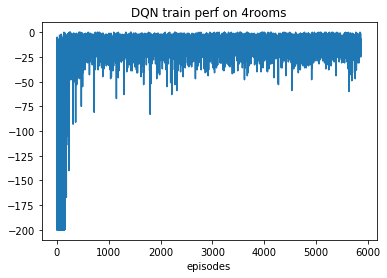

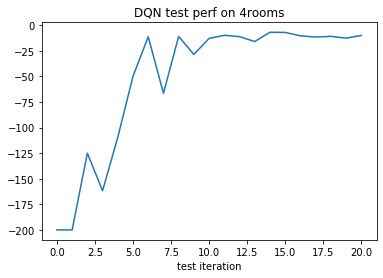

In [11]:
import matplotlib.pyplot as plt

plt.plot(returns_train)
plt.title('DQN train perf on 4rooms')
plt.xlabel('episodes')
plt.show()

plt.plot(returns_test)
plt.title('DQN test perf on 4rooms')
plt.xlabel('test iteration')
plt.show()

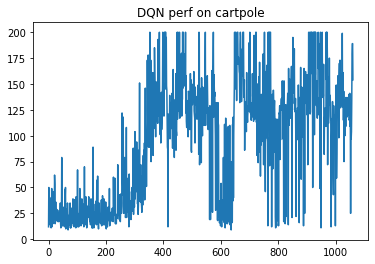

In [13]:
import matplotlib.pyplot as plt
plt.plot(returns)
plt.title('DQN perf on cartpole')
plt.show()

In [5]:
from gym import spaces

In [8]:
len(np.array([1,2,3]))

3